<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

TruncatedSVD with Scale

This code template is for simple TruncatedSVD in python for dimensionality reduction technique with Scale feature scaling. Truncated SVD is different from regular SVDs in that it produces a factorization where the number of columns is equal to the specified truncation.

### Required Packages

In [ ]:
!pip install imblearn

In [25]:
import warnings 
import itertools
import numpy as np 
import pandas as pd 
import seaborn as se 
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from sklearn.preprocessing import LabelEncoder, Normalizer,scale
from sklearn.decomposition import TruncatedSVD
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [26]:
#filepath
file_path= ""

List of features which are  required for model training .

In [40]:
#x_values
features=[]

Target feature for prediction.

In [41]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [30]:
df=pd.read_csv(file_path)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [31]:
X=df[features]
Y = df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [32]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)


Calling preprocessing functions on the feature and target set.


In [33]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])  
X=EncodeX(X)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


### Correlation Map
In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.


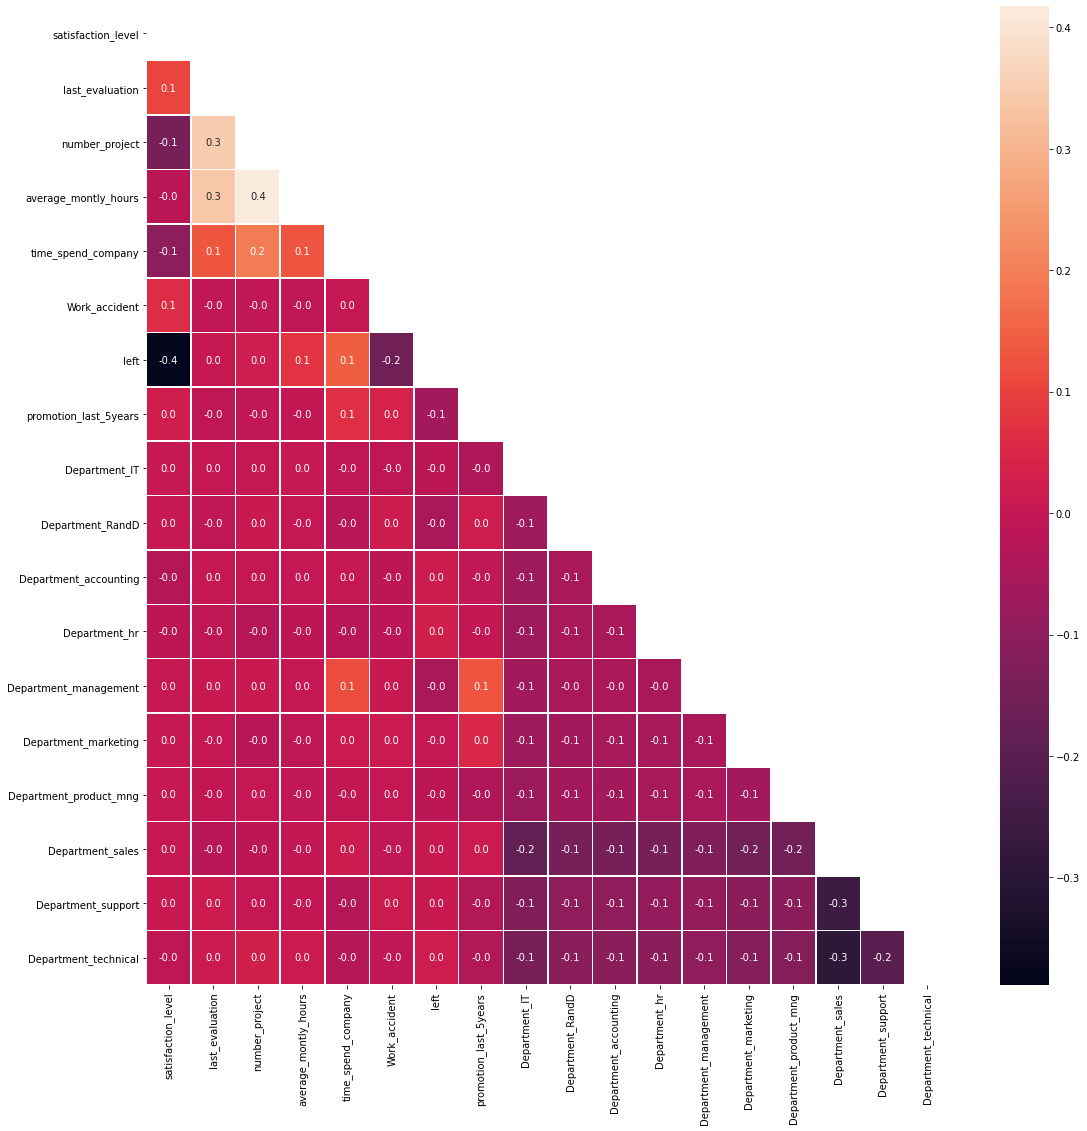

In [34]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

#### Rescaling technique

Standardize a dataset along any axis.

Center to the mean and component wise scale to unit variance. [Scale API](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html)

In [35]:
X_Scaled = scale(X)
X_Scaled=pd.DataFrame(data = X_Scaled,columns = X.columns)
X_Scaled.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,1.788917,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,1.788917,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,1.788917,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,1.788917,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,1.788917,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655



### Choosing the number of components

A vital part of using Dimensionality Reduction in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components.

This curve quantifies how much of the total, dimensional variance is contained within the first N components.


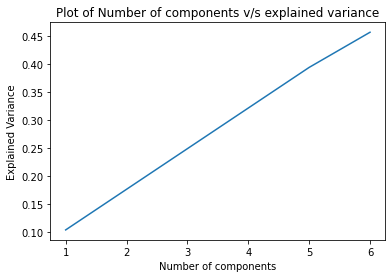

In [36]:
n_comp = [i for i in range(1,X.shape[1]) if i % 5 in (0,1)] 
n_comp=n_comp[:(len(n_comp)//2)]
explained = [] 
for x in n_comp:
    svd = TruncatedSVD(n_components=x)
    svd.fit(X_Scaled)
    explained.append(svd.explained_variance_ratio_.sum())
plt.plot(n_comp, explained)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()


#### Scree plot

The scree plot helps you to determine the optimal number of components. The eigenvalue of each component in the initial solution is plotted. Generally, you want to extract the components on the steep slope. The components on the shallow slope contribute little to the solution.


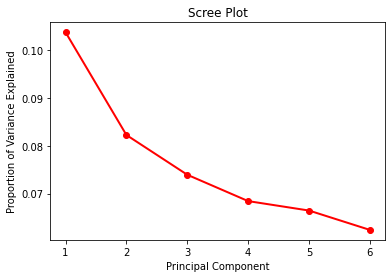

In [37]:
PC_values = np.arange(n_comp[-1]) + 1
plt.plot(PC_values, svd.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()


### Model

This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently.
Tuning Parameter

    n_components:Desired dimensionality of output data. Must be strictly less than the number of features. The default value is useful for visualisation. For LSA, a value of 100 is recommended.

    algorithm:SVD solver to use.

    n_iter:Number of iterations for randomized SVD solver.

    tol:Tolerance for ARPACK.


[For more detail on API](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)



In [38]:
svd = TruncatedSVD(n_components=6)
svdX = pd.DataFrame(data = svd.fit_transform(X_Scaled))

### Output Dataframe

In [39]:
finalDf = pd.concat([svdX, Y], axis = 1)
finalDf.head()

,0,1,2,3,4,5,salary
0,-1.361089,-2.528835,1.567730,-0.419498,0.091082,-0.279467,low
1,2.356462,-0.524962,1.848068,-0.637703,0.035517,-0.174787,medium
2,3.477143,-1.781986,1.580069,-0.855339,-0.034443,-0.157080,medium
3,1.805269,-0.762820,1.733236,-0.729935,0.032446,-0.186962,low
4,-1.359615,-2.563232,1.568833,-0.411566,0.091798,-0.279767,low


#### Creator: Jay Shimpi, Github: [Profile](https://github.com/JayShimpi22)
